In [1]:
# Enter your name here

# EunJung Kim

In [1]:
# Standard Headers
# You may add additional headers here if needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'1.3.4'

# Assignment 1: Data Preprocessing

## Part 1: Data Cleaning, Exploration, and Feature Engineering

For this part of the assignment you'll be using the 1994 Adult Census Income dataset (`adult.csv`) collected by Ronny Kohavi and Barry Becker. It contains 32,561 records with 14 features.

Q1. Read the dataset from `adult.csv` into a Pandas dataframe. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

**Important:**
* Notice in the csv file that `?` is used to indicate missing values. We want all of the missing values to be represented by NaNs in the dataframe. Make sure that all of the `?` are converted to `NaN` in your dataframe!
* Also, set the `skipinitialspace` parameter to `True`. (This will be necessary for the `map()` function to work later in the assignment.)

In [2]:
# Q1

df = pd.read_csv("adult.csv", na_values = "?", skipinitialspace = True)
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,NaN,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,54.0,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40.0,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22.0,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Q2. Start by looking for missing values. How many missing values are there in this dataset?

In [3]:
# Q2

df.isna().sum().sum()

4290

Q3. Clean up some of the missing values. 
* Drop all of the records from the dataset that are missing `workclass` or `occupation`.
* For records missing values in `native-country`, impute those by using a "forward fill." This will fill in the missing value with the same value as the previous record. 
* For records missing `age`, leave those as-is for now. We will do a similar-case imputation on them later! 

Print something to show that there are no longer missing values in `workclass`, `occupation`, or `native-country`.

In [4]:
# Q3

df_dropped = df.dropna(subset=['workclass', 'occupation'])
df_dropped['native-country'].fillna(method = 'ffill', inplace = True)

print("workclass null sum : ", df_dropped['workclass'].isna().sum(), 
      "\noccupation null sum : ", df_dropped['occupation'].isna().sum(), 
      "\nnative-country null sum : ", df_dropped['native-country'].isna().sum())

workclass null sum :  0 
occupation null sum :  0 
native-country null sum :  0


/Users/eunjung/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Q4. Explore the data:
* How is the dataset distributed between people who make <=50K income and those who make >50K income? 
* How is the dataset distributed between males & females?
* Create a plot to show the distribution of the datset by `education`.
* Create a plot to show the distribution of the ages in the dataset.

In [5]:
# Q4

print(df_dropped['income'].value_counts())
print(df_dropped['sex'].value_counts())

<=50K    23068
>50K      7650
Name: income, dtype: int64
Male      20788
Female     9930
Name: sex, dtype: int64


<AxesSubplot:>

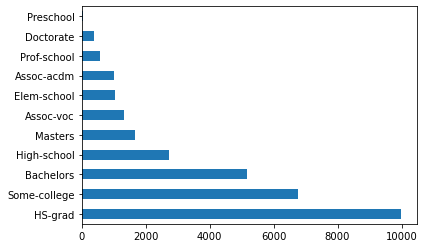

In [6]:
df_education = df_dropped['education'].value_counts()
df_education.plot(kind="barh")

<AxesSubplot:>

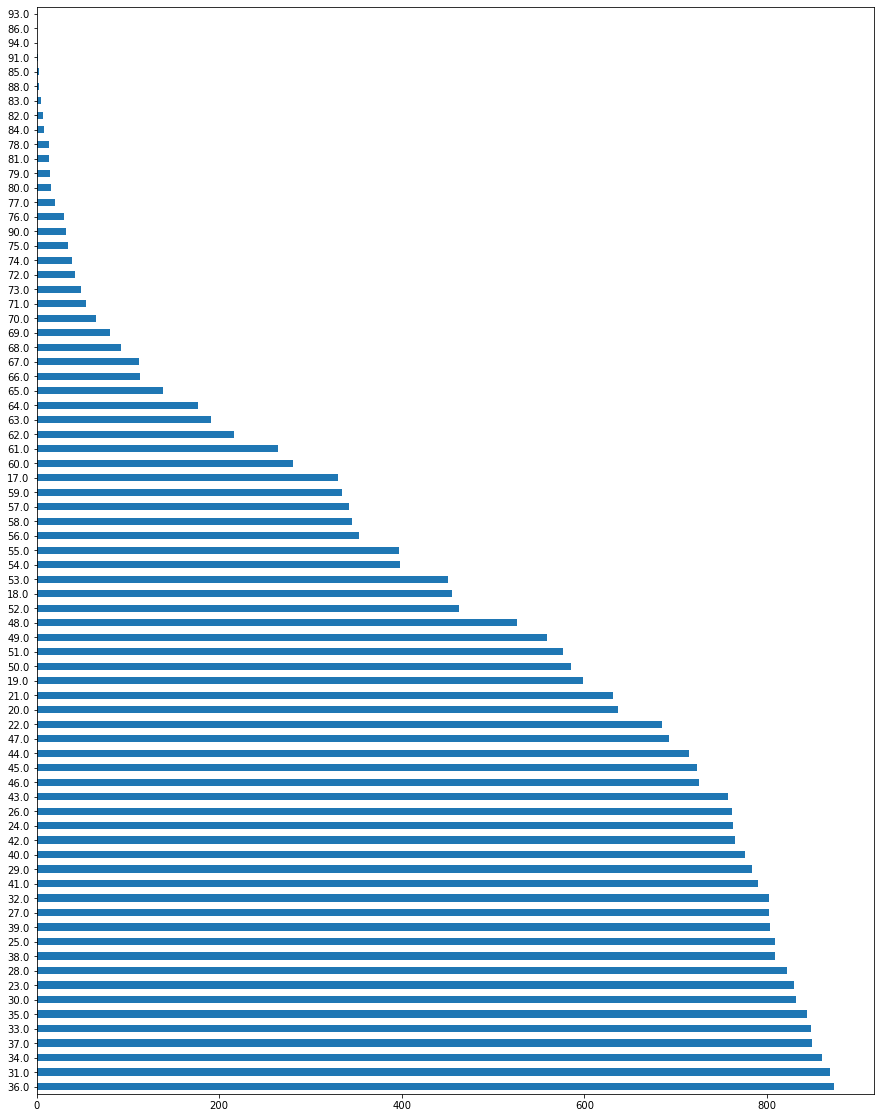

In [7]:
df_age = df_dropped['age'].value_counts()
df_age.plot(kind="barh", figsize=(15,20))

Q5. Create a plot to determine if there are any outliers in the  `capital-gain` column.  
Answer as a comment: What values would you consider to be outliers in this column? Explain why.

              counts
capital-gain        
15024.0          343
7688.0           278
7298.0           244
99999.0          155
3103.0            94
...              ...
1639.0             1
6097.0             1
4931.0             1
5060.0             1
2387.0             1

[117 rows x 1 columns]
              counts
capital-gain        
22040.0            1
2538.0             1
401.0              1
1086.0             1
1173.0             1
2993.0             1
1455.0             1
7978.0             1
1639.0             1
6097.0             1
4931.0             1
5060.0             1
2387.0             1


"\n\nAmong the values in 'cg_value_count_one' parameter, \nby checking the box graph under, the values which are placed outside of the box are the outliers.\n\nI make a histogram plot and box plot to check the distribution of values in the 'capital-gain' column.\n\nHistogram plot shows me that far-off values are existing in 'capital-gain' column.\n\nFor the box plot, I drop the 0 values since boxplot is not able to be checked clear if there are too many 0 values.\nBox plot also shows me there are some far-off values from the median.\n\nBy the plot images, it is able to know they are some too huge values in 'capital-gain' column, \ncompare to the other values in histogram or median value in box plot.\n\n\n"

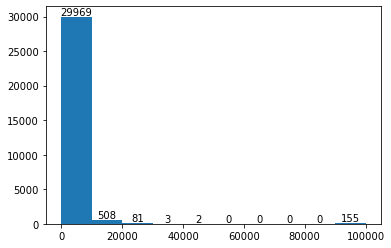

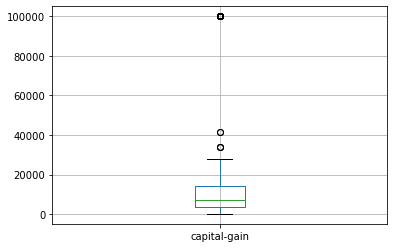

<Figure size 432x288 with 0 Axes>

In [8]:
# Q5

import numpy as np

df_capitalgain = df_dropped['capital-gain'].replace(0, np.NaN)

# Histogram plot
values, bins, bars = plt.hist(df_dropped['capital-gain'])
plt.bar_label(bars)
plt.figure()

# Box plot
df_capitalgain.to_frame().boxplot()
plt.figure()

# capital-gain values count without 0 values
capital_gain_value = df_capitalgain.dropna().to_frame().value_counts().to_frame('counts')
print(capital_gain_value)

# capital_gain_value which only has one count
cg_value_count_one = capital_gain_value[capital_gain_value['counts'] == 1]
print(cg_value_count_one)


# What values would you consider to be outliers in this column? Explain why.
'''

Among the values in 'cg_value_count_one' parameter, 
by checking the box graph under, the values which are placed outside of the box are the outliers.

I make a histogram plot and box plot to check the distribution of values in the 'capital-gain' column.

Histogram plot shows me that far-off values are existing in 'capital-gain' column.

For the box plot, I drop the 0 values since boxplot is not able to be checked clear if there are too many 0 values.
Box plot also shows me there are some far-off values from the median.

By the plot images, it is able to know they are some too huge values in 'capital-gain' column, 
compare to the other values in histogram or median value in box plot.


'''

Q6. Using the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), group the data by  `marital-status`. 

Display each marital status along with it's mean age, in sorted order from least to greatest.

In [9]:
# Q6

df_dropped.groupby(['marital-status']).mean()['age'].sort_values().to_frame()

,age
marital-status,
Never-married,28.471218
Married-AF-spouse,31.250000
Separated,39.507821
Married-spouse-absent,40.290488
Married-civ-spouse,42.770487
Divorced,42.896333
Widowed,57.742857


Q7. Now fill in those missing age values, using similar case imputation. For each missing age, fill it in with the **median** age of that person's marital-status category. Use **median** rather than mean for this, so that we only use whole numbers for ages. Display the head of the dataframe.

In [10]:
# Q7

ms_age_median = df_dropped.groupby(['marital-status']).median()['age'].to_dict()

median_map = df_dropped['marital-status'].map(ms_age_median)

df_dropped['age'] = df_dropped['age'].fillna(median_map).to_frame()
df_dropped.head()

/var/folders/rn/_lsy2hbj3sd32_d9c7l6l3x40000gn/T/ipykernel_15575/2442209601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['age'] = df_dropped['age'].fillna(median_map).to_frame()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,42.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Q8. Display everyone who is over 90 years old.  

In [11]:
# Q8

df_dropped[df_dropped['age'] > 90]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
222,91.0,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
5272,94.0,Private,High-school,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
32277,91.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,93.0,Local-gov,Elem-school,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K


Q9. Create a scatter plot between `age` and `hours-per-week` **for only the first 100 datapoints in the dataset.**  
Place `age` on the X axis. Color each datapoint according to their income - one color for those that make <=50K, and another color for those that make >50K.

Answer as a comment: What observations or insights can you make by looking at this plot?

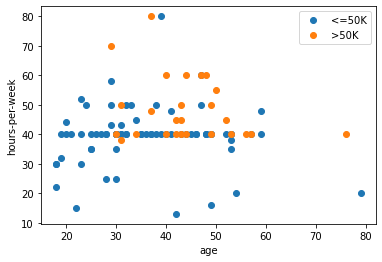

'\n1) Most of people are working about 40 hours per week without considering the age, \n   since most of the dots are almost making a line there.\n2) By observing orange color dots, usually person who works more than 40 hours earns more income (>50k).\n3) By observing blue color dots, people who works less than 40 hours have income of <=50k.\n'

In [12]:
# Q9

df_100 = df_dropped.head(100)

groups = df_100.groupby('income')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['age'], 
            group['hours-per-week'], 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(loc='upper right')
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.show()


# What observations or insights can you make by looking at this plot?
'''
1) Most of people are working about 40 hours per week without considering the age, 
   since most of the dots are almost making a line there.
2) By observing orange color dots, usually person who works more than 40 hours earns more income (>50k).
3) By observing blue color dots, people who works less than 40 hours have income of <=50k.
'''

Q10. Feature engineering: Using the dictionary provided below, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for Series [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [13]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Asia',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
}

In [14]:
# Q10

# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
df_dropped_copy = df_dropped.copy()

# add the new column to adult_data_copy
df_dropped_copy_map = df_dropped_copy['native-country'].map(continent_dict)
df_dropped_copy['continent'] = df_dropped_copy_map

df_dropped_copy.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,continent
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,42.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
5,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q11. Plot a bar graph showing the average age of adults from each continent, and show the standard deviations on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen5.png" width=200>

<BarContainer object of 4 artists>

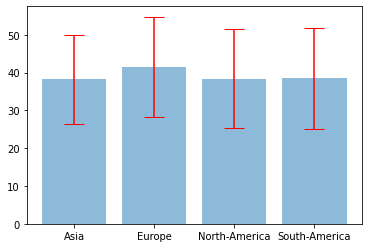

In [15]:
# Q11

df_age_mean_std = df_dropped_copy.groupby('continent').agg([np.mean, np.std])['age']

fig, ax = plt.subplots()
ax.bar(df_age_mean_std.index, df_age_mean_std['mean'],
       yerr=df_age_mean_std['std'],
       align='center',
       alpha=0.5, 
       ecolor='red',
       capsize=10)

Q12. To reduce the dimensionality of this dataset via feature selection, which attribute or attributes would you eliminate? Explain why as a comment.

In [16]:
'''Explain here (as a comment):

- I could drop 'relationship' because it is able to be expected and created by 'marital-status' and their 'sex'.
- I could drop 'education-num' because it is able to be calculated and created by 'education'.
- I could drop 'capital-gain' and 'capital-loss' since there is 'income' information, and they have some big outliers.

'''

"Explain here (as a comment):\n\n- I could drop 'relationship' because it is able to be expected and created by 'marital-status' and their 'sex'.\n- I could drop 'education-num' because it is able to be calculated and created by 'education'.\n- I could drop 'capital-gain' and 'capital-loss' since there is 'income' information, and they have some big outliers.\n\n"

## Part 2: Data Scaling and Dimensionality Reduction

For this part you'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

<img src="imgs/screen4.png">

Q13. Read the dataset from `leaf.csv` into a dataframe. Display the head of the dataframe.

In [17]:
# Q13

df_leaf = pd.read_csv("leaf.csv")
df_leaf.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q14. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. As a comment, explain how you would handle these missing values, then go ahead and handle them (in code). Display the resulting head of the dataframe.

In [18]:
# Q14

'''

I think 'eccentricity' has a high correlation with 'aspect-ratio' and 'smoothness'.
If 'eccentricity' has higher value, usually 'aspect-ratio' also had a higher value. 
On the contrary, if 'eccentricity' has higher value, usually 'smoothness' has lower value.

By this observation, 
I decide to make linear regression relation between ['aspect-ratio', 'smoothness'] and ['eccentricity'].
I use sklearn.linear_model.LinearRegression to create model, and train the model with datas.
And use fillna() to fill NaN values with predicted data from model in 'eccentricity'.

'''

from sklearn.linear_model import LinearRegression

X = df_leaf.dropna(axis=0)[['aspect-ratio', 'smoothness']]
y = df_leaf.dropna(axis=0)['eccentricity'] 

lin_reg_model = LinearRegression().fit(X, y)

y_pred = lin_reg_model.predict(df_leaf.loc[:, ['aspect-ratio', 'smoothness']])

df_leaf['eccentricity'].fillna(pd.Series(y_pred.flatten()), inplace=True)

df_leaf.head(11)

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.466444,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660
5,2,0.582320,1.3430,0.29271,0.95055,0.99825,0.71499,0.026876,0.131460,0.068134,0.132040,0.017136,0.003680,0.001470,1.63150
6,1,0.548930,1.1111,0.63983,0.56623,0.60000,0.15743,0.130810,3.114300,0.021231,0.079722,0.006315,0.001912,0.000074,0.71949
7,1,0.523820,1.1117,0.67175,0.54701,0.62982,0.15157,0.136740,3.402800,0.026434,0.085792,0.007306,0.002137,0.000166,0.90513
8,4,0.995710,10.3520,0.90609,0.90652,0.97895,0.16732,0.025787,0.121030,0.023523,0.089455,0.007939,0.002888,0.000069,0.73774
9,1,0.390920,1.0870,0.68174,0.50961,0.66140,0.15361,0.140820,3.609300,0.028638,0.089135,0.007882,0.002118,0.000210,0.90082


Q15. Data scaling: Standardize the features in the `leaf_data` dataset so that all of the features are on the same scale.

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [19]:
# Q15

scaler = StandardScaler()
df_leaf_scaled = scaler.fit_transform(df_leaf)
df_leaf_scaled = pd.DataFrame(df_leaf_scaled, columns=[df_leaf.columns])
df_leaf_scaled.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,-1.196975,-0.397570,-0.531196,0.395212,-1.262773,-0.441095,-0.875478,1.116108,0.890913,-0.358758,-0.276976,-0.366061,-0.335186,-0.446737,-0.263256
1,1.470569,1.740213,1.447597,1.416854,0.559789,0.714453,-0.809227,-0.740953,-0.688901,-0.579956,-0.734593,-0.674961,-0.813314,-0.456439,-0.533339
2,0.581388,-1.503811,-0.522047,-1.012484,0.638209,0.692846,0.299095,-0.681097,-0.674420,0.557730,0.823063,0.635813,0.761190,0.043125,0.764238
3,-1.196975,-0.172437,-0.508525,0.691019,-1.598947,-1.434686,-0.953551,1.524256,1.551250,-0.417379,-0.354676,-0.423053,-0.379852,-0.496638,-0.322750
4,0.581388,-0.939033,-0.508165,-0.922422,0.637376,0.692846,0.395487,-0.588718,-0.647312,2.227521,1.846307,1.882116,1.424579,1.512359,2.769444


Q16. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensions are necessary to retain 95% of the variance. 
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform). 
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [20]:
# Q16

pca = PCA(n_components = 0.95, svd_solver = 'full')
df_leaf_pca = pca.fit_transform(df_leaf_scaled)
df_leaf_pca = pd.DataFrame(df_leaf_pca)
df_leaf_pca.head()

,0,1,2,3
0,-1.846989,-1.816530,-0.026500,0.025427
1,-1.390149,3.250530,-1.229169,-0.250222
2,2.418248,-0.205475,0.506100,1.104853
3,-2.643928,-2.462031,-0.453939,-0.215250
4,4.913159,-1.097725,-1.222212,-0.166125
